In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import os
import cv2
import glob
from PIL import Image
from sklearn.model_selection import train_test_split
from tensorflow import keras

In [2]:
print(tf.__version__)
print(keras.__version__)

2.0.0
2.2.4-tf


In [3]:
os.chdir(r'C:\Users\doyoung_2\Desktop\21-2학기\딥러닝pbl\프로젝트\데이터\data\train')

In [4]:
car_type = os.listdir()
car_dic = {}

In [5]:
for i in range(len(car_type)):
    car_dic[car_type[i]] = i

In [6]:
list(car_dic.keys())

['SUV', '버스', '세단', '승합', '이륜차', '컨버터블', '쿠페', '트럭', '특수', '해치백', '화물']

In [7]:
car_dic

{'SUV': 0,
 '버스': 1,
 '세단': 2,
 '승합': 3,
 '이륜차': 4,
 '컨버터블': 5,
 '쿠페': 6,
 '트럭': 7,
 '특수': 8,
 '해치백': 9,
 '화물': 10}

In [11]:
X = []
y = []

## Train DATA 수집

In [9]:
# # 이미지 컬러
# os.chdir(r'C:\Users\doyoung_2\Desktop\21-2학기\딥러닝pbl\프로젝트\데이터\data\train')
# car_l = os.listdir()
# count1 = 0
# for i in car_l:
#     os.chdir(r'C:\Users\doyoung_2\Desktop\21-2학기\딥러닝pbl\프로젝트\데이터\data\train\{0}'.format(i))
#     for j in range(len(os.listdir())):
#         folder = os.listdir()[j]
#         os.chdir(os.path.join(os.getcwd(), folder))
#         jpg_l = os.listdir()
#         count1 += len(jpg_l)
#         for jpg_name in jpg_l:
#             jpg = Image.open(jpg_name)
#             jpg = jpg.resize( (128,128) )
#             jpg = np.array(jpg)
#             X.append(jpg)
#             label = i
#             label = car_dic[label]
#             y.append(label)
#         os.chdir(r'C:\Users\doyoung_2\Desktop\21-2학기\딥러닝pbl\프로젝트\데이터\data\train\{0}'.format(i))
# print(count1, len(X), len(y))

KeyboardInterrupt: 

In [12]:
# 이미지 흑백으로 전환 
os.chdir(r'C:\Users\doyoung_2\Desktop\21-2학기\딥러닝pbl\프로젝트\데이터\data\train')
car_l = os.listdir()
count1 = 0
for i in car_l:
    os.chdir(r'C:\Users\doyoung_2\Desktop\21-2학기\딥러닝pbl\프로젝트\데이터\data\train\{0}'.format(i))
    for j in range(len(os.listdir())):
        folder = os.listdir()[j]
        os.chdir(os.path.join(os.getcwd(), folder))
        jpg_l = os.listdir()
        count1 += len(jpg_l)
        for jpg_name in jpg_l:
            jpg = Image.open(jpg_name).convert('L')
            jpg = jpg.resize( (128,128) )
            jpg = np.array(jpg)
            X.append(jpg)
            label = i
            label = car_dic[label]
            y.append(label)
        os.chdir(r'C:\Users\doyoung_2\Desktop\21-2학기\딥러닝pbl\프로젝트\데이터\data\train\{0}'.format(i))
print(count1, len(X), len(y))

406554 406554 406554


In [13]:
print(count1, len(X), len(y))

406554 406554 406554


## Test Data 수집

In [11]:
# # 컬러 이미지
# os.chdir(r'C:\Users\doyoung_2\Desktop\21-2학기\딥러닝pbl\프로젝트\데이터\data\test')
# car_l = os.listdir()
# count = 0
# for i in car_l:
#     os.chdir(r'C:\Users\doyoung_2\Desktop\21-2학기\딥러닝pbl\프로젝트\데이터\data\test\{0}'.format(i))
#     for j in range(len(os.listdir())):
#         folder = os.listdir()[j]
#         os.chdir(os.path.join(os.getcwd(), folder))
#         jpg_l = os.listdir()
#         count += len(jpg_l)
#         for jpg_name in jpg_l:
#             jpg = Image.open(jpg_name)
#             jpg = jpg.resize( (128,128) )
#             jpg = np.array(jpg)
#             X.append(jpg)
#             label = i
#             label = car_dic[label]
#             y.append(label)
#         os.chdir(r'C:\Users\doyoung_2\Desktop\21-2학기\딥러닝pbl\프로젝트\데이터\data\test\{0}'.format(i))
# print(count, len(X), len(y))

46722 453276 453276


In [14]:
# 흑백 이미지
os.chdir(r'C:\Users\doyoung_2\Desktop\21-2학기\딥러닝pbl\프로젝트\데이터\data\test')
car_l = os.listdir()
count = 0
for i in car_l:
    os.chdir(r'C:\Users\doyoung_2\Desktop\21-2학기\딥러닝pbl\프로젝트\데이터\data\test\{0}'.format(i))
    for j in range(len(os.listdir())):
        folder = os.listdir()[j]
        os.chdir(os.path.join(os.getcwd(), folder))
        jpg_l = os.listdir()
        count += len(jpg_l)
        for jpg_name in jpg_l:
            jpg = Image.open(jpg_name).convert('L')
            jpg = jpg.resize( (128,128) )
            jpg = np.array(jpg)
            X.append(jpg)
            label = i
            label = car_dic[label]
            y.append(label)
        os.chdir(r'C:\Users\doyoung_2\Desktop\21-2학기\딥러닝pbl\프로젝트\데이터\data\test\{0}'.format(i))
print(count, len(X), len(y))

46722 453276 453276


### 나만의 이미지 데이터셋 만들기

In [15]:
X = np.array(X)
y = np.array(y)

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify=y, shuffle=True, random_state=34)

print('X_train shape :', X_train.shape)
print('X_test shape :', X_test.shape)
print('y_train shape :', y_train.shape)
print('y_test shape :', y_test.shape)

X_train shape : (362620, 128, 128)
X_test shape : (90656, 128, 128)
y_train shape : (362620,)
y_test shape : (90656,)


In [17]:
from tensorflow.keras.utils import to_categorical, plot_model

X_train = X_train.reshape(-1, 128,128, 1).astype('float32') / 255
X_test = X_test.reshape(-1, 128,128, 1).astype('float32') / 255

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [18]:
print('X_train shape :', X_train.shape)
print('X_test shape :', X_test.shape)
print('y_train shape :', y_train.shape)
print('y_test shape :', y_test.shape)

X_train shape : (362620, 128, 128, 1)
X_test shape : (90656, 128, 128, 1)
y_train shape : (362620, 11)
y_test shape : (90656, 11)


In [19]:
dataset = (X_train, X_test, y_train, y_test)

In [20]:
dataset_l = list(dataset)

In [21]:
os.chdir(r'C:\Users\doyoung_2\Desktop\21-2학기\딥러닝pbl\프로젝트\데이터')

In [22]:
# 데이터셋 저장
import pickle
with open('cartype3.pickle', 'wb') as f: # cartype1 : 흑백 / cartype2 : 컬러 / cartype3 : 전처리 진행된 흑백
    pickle.dump(dataset_l, f, protocol=4)

In [14]:
# y_train = y_train[..., tf.newaxis]
# y_test = y_test[..., tf.newaxis]

In [18]:
print('X_train shape :', X_train.shape)
print('X_test shape :', X_test.shape)
print('y_train shape :', y_train.shape)
print('y_test shape :', y_test.shape)

X_train shape : (362620, 128, 128)
X_test shape : (90656, 128, 128)
y_train shape : (362620,)
y_test shape : (90656,)


In [27]:
print(type(X_train))
print(type(y_train))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [16]:
# training set의 각 class 별 image 수 확인

In [19]:
unique, counts = np.unique(y_train, return_counts=True)
print('Train labels:', dict(zip(unique, counts)))
unique, counts = np.unique(y_test, return_counts=True)
print('Test labels:', dict(zip(unique, counts)))

Train labels: {0: 90755, 1: 11433, 2: 161260, 3: 30656, 4: 7903, 5: 12, 6: 447, 7: 6450, 8: 49, 9: 33581, 10: 20074}
Test labels: {0: 22689, 1: 2858, 2: 40315, 3: 7664, 4: 1976, 5: 3, 6: 112, 7: 1612, 8: 12, 9: 8396, 10: 5019}


In [18]:
# 4개의 임의 표본 추출하기

In [70]:
indices = np.random.randint(0, X_train.shape[0], size=4) # x_train.shape[0]=362,620 0~362,620 사이에서 4개 이미지 선택
images = X_train[indices]
labels = y_train[indices]

In [20]:
# 4개 표본 그림그리기

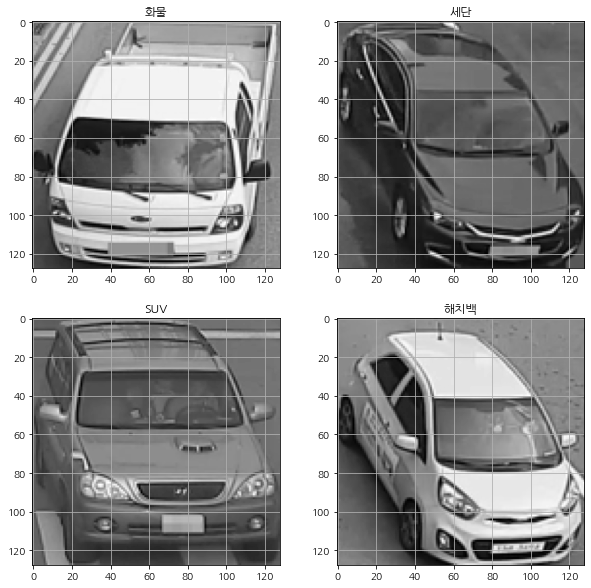

In [71]:
plt.figure(figsize=(10,10))
for i in range(len(indices)):
    plt.subplot(2,2, i+1)
    image = images[i]
    plt.imshow(image, cmap='gray')
    plt.title(list(car_dic.keys())[labels[i]])
    plt.grid('off')
plt.show()